# Statsmodels

In [65]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
chocolura = pd.read_csv('dados/vendas_por_dia_analise.csv') 

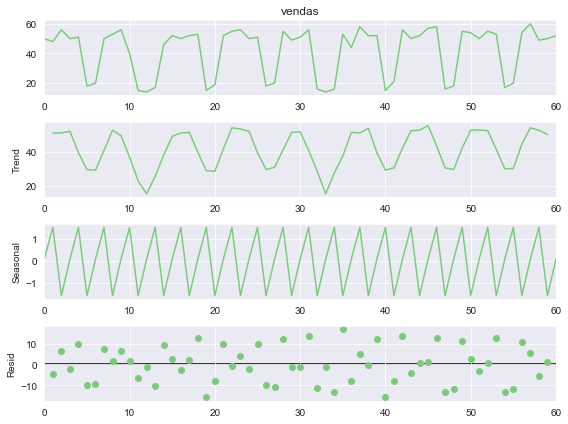

In [66]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 8, 6
resultado = seasonal_decompose(chocolura['vendas'], period=3)
resultado.plot()
plt.show()

In [67]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [68]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,50.0,NaN,0.073977,NaN
1,48.0,51.333333,1.504678,-4.838012
2,56.0,51.333333,-1.578655,6.245322
3,50.0,52.333333,0.073977,-2.407310
4,51.0,39.666667,1.504678,9.828655


In [69]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')    
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

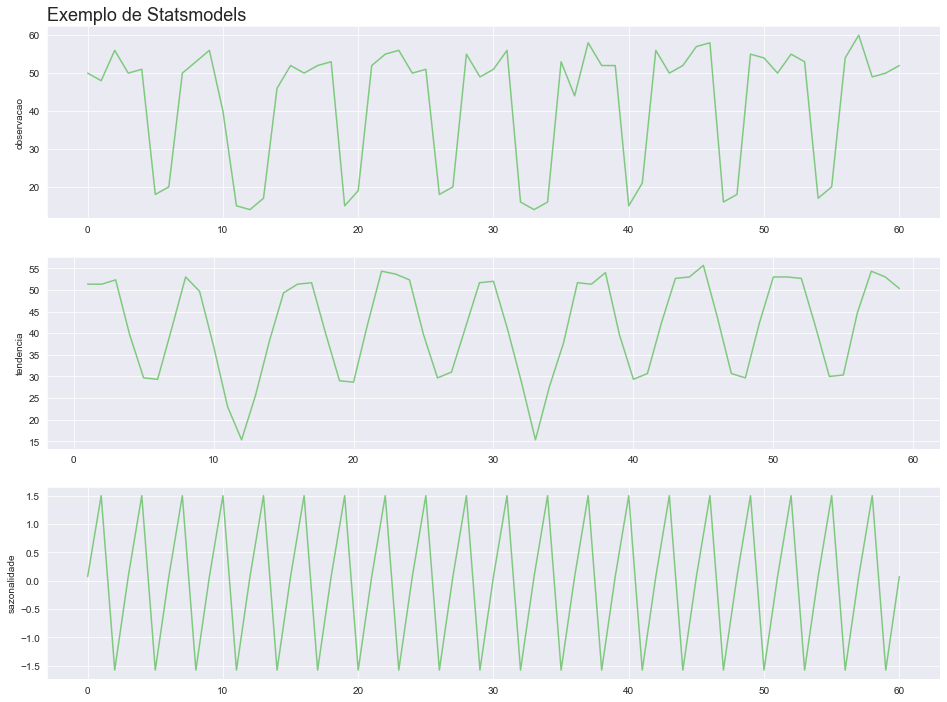

In [70]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')